# EDA_1

## Import Dependencies

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

The clipping function removes outliers using IQR. It calculates the 1st and 3rd quartiles, computes the IQR, and defines thresholds. Values outside these thresholds are clipped to the nearest threshold. This ensures all data falls within a defined range, effectively handling outliers.

In [2]:
def clipping(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    lower_threshold = Q1 - 1.5*IQR
    upper_threshold = Q3 + 1.5*IQR
    data = data.apply(lambda x:x if x >= lower_threshold and x<= upper_threshold
                              else(lower_threshold if x < lower_threshold else upper_threshold))
    return data

## Box and Histogram plot function

In [3]:
def box_hist(data): 
    fig, axs= plt.subplots(1,2,figsize=(12,3))

    sns.boxplot(data, ax=axs[0])
    axs[0].set_title('Boxplot')

    sns.histplot(data, ax=axs[1],kde=True)
    axs[1].set_title('Histogram')

    plt.tight_layout()
    return plt.show()

## Load the dataset 

In [4]:
data = pd.read_csv('Cardiotocographic.csv')
data.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

I checked the basic information about the data.

In [5]:
data.shape

(2126, 14)

In [6]:
data.tail()

LB        AC        FM        UC   DL   DS   DP  ASTV  MSTV  \
2121  140.0  0.000000  0.961268  0.007426  0.0  0.0  0.0  79.0   0.2   
2122  140.0  0.000775  0.000000  0.006979  0.0  0.0  0.0  78.0   0.4   
2123  140.0  0.000980  0.000000  0.006863  0.0  0.0  0.0  79.0   0.4   
2124  140.0  0.000679  0.000000  0.006110  0.0  0.0  0.0  78.0   0.4   
2125  142.0  0.001616 -0.000188  0.008078  0.0  0.0  0.0  74.0   0.4   

           ALTV  MLTV  Width  Tendency       NSP  
2121  25.000000   7.2   40.0       0.0  2.000000  
2122  22.000000   7.1   66.0       1.0  2.000000  
2123  20.000000   6.1   67.0       1.0  1.990464  
2124  27.000000   7.0   66.0       1.0  2.000000  
2125  35.857183   5.0   42.0       0.0  1.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


All columns are in correct format

In [8]:
data[data.isnull().any(axis=1)]

LB        AC        FM        UC        DL  DS  DP       ASTV      MSTV  \
50   NaN       NaN  0.000000  0.008086  0.000000 NaN NaN  29.000000  1.300000   
116  NaN  0.038567  0.000000  0.006993  0.002331 NaN NaN  26.000000  4.300000   
126  NaN       NaN  0.000000  0.004380  0.000000 NaN NaN  69.000000  0.300000   
201  NaN       NaN  0.016393  0.000000  0.000000 NaN NaN  56.000000  0.500000   
566  NaN       NaN  0.000000  0.004115  0.005487 NaN NaN  43.000000  2.500000   
574  NaN       NaN  0.000000  0.002611  0.002611 NaN NaN  34.000000  4.900000   
603  NaN       NaN  0.006519  0.001304  0.001304 NaN NaN  73.000000  0.700000   
935  NaN       NaN  0.000000  0.005495  0.001374 NaN NaN  30.000000  1.251793   
936  NaN       NaN  0.000000  0.007802  0.000000 NaN NaN  33.000000  1.000000   
1013 NaN       NaN  0.000000  0.003861  0.000000 NaN NaN  34.000000  1.000000   
1205 NaN       NaN -0.000129  0.006424  0.000000 NaN NaN  63.000000  0.500000   
1332 NaN       NaN  0.010204  0.002551  0.005102 NaN NaN  27.000000  1.900000   
1347 NaN       NaN  0.018519  0.003466  0.002315 NaN NaN  30.000000  2.100000   
1430 NaN       NaN -0.001442  0.005038  0.000000 NaN NaN  42.000000  0.700000   
1636 NaN       NaN  0.005650  0.004708  0.001883 NaN NaN  51.000000  2.800000   
1645 NaN       NaN  0.000000  0.005015  0.005015 NaN NaN  51.000000  1.500000   
1792 NaN       NaN  0.001029  0.003086  0.011317 NaN NaN  67.000000  2.100000   
1854 NaN       NaN  0.000000  0.006369  0.000796 NaN NaN  51.000000  1.200000   
1863 NaN       NaN  0.000000  0.003257  0.000000 NaN NaN  51.000000  1.000000   
1928 NaN       NaN  0.002976  0.004960  0.002976 NaN NaN  63.000000  1.700000   
1934 NaN       NaN  0.003049  0.009146  0.003811 NaN NaN  61.926728  2.500000   

           ALTV  MLTV  Width  Tendency  NSP  
50     0.000000   NaN    NaN       NaN  NaN  
116    0.532872   NaN    NaN       NaN  NaN  
126   21.000000   NaN    NaN       NaN  NaN  
201   12.000000   NaN    NaN       NaN  NaN  
566    0.000000   NaN    NaN       NaN  NaN  
574    0.000000   NaN    NaN       NaN  NaN  
603    0.000000   NaN    NaN       NaN  NaN  
935    0.000000   NaN    NaN       NaN  NaN  
936    0.000000   NaN    NaN       NaN  NaN  
1013   0.000000   NaN    NaN       NaN  NaN  
1205  35.000000   NaN    NaN       NaN  NaN  
1332   0.000000   NaN    NaN       NaN  NaN  
1347   0.000000   NaN    NaN       NaN  NaN  
1430   0.000000   NaN    NaN       NaN  NaN  
1636   0.000000   NaN    NaN       NaN  NaN  
1645   0.000000   NaN    NaN       NaN  NaN  
1792   0.000000   NaN    NaN       NaN  NaN  
1854   0.000000   NaN    NaN       NaN  NaN  
1863   0.000000   NaN    NaN       NaN  NaN  
1928   5.000000   NaN    NaN       NaN  NaN  
1934   0.000000   NaN    NaN       NaN  NaN

In [9]:
data.dropna(inplace=True)

In [10]:
correlation = data.corr()
correlation

LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.063830  0.018777 -0.166570 -0.126959 -0.005438   
AC       -0.063830  1.000000  0.010152  0.070135 -0.095491 -0.033623   
FM        0.018777  0.010152  1.000000 -0.052979  0.009830  0.029901   
UC       -0.166570  0.070135 -0.052979  1.000000  0.191864 -0.006937   
DL       -0.126959 -0.095491  0.009830  0.191864  1.000000  0.058625   
DS       -0.005438 -0.033623  0.029901 -0.006937  0.058625  1.000000   
DP       -0.047724 -0.084590  0.121284  0.070658  0.145425  0.004285   
ASTV      0.242625 -0.230487 -0.032783 -0.181133 -0.070792  0.008452   
MSTV     -0.170473  0.126752  0.017481  0.190011  0.410155  0.016163   
ALTV      0.210728 -0.273890 -0.012276 -0.227817 -0.186571 -0.004398   
MLTV     -0.003457 -0.106529 -0.006237 -0.049460 -0.165750  0.034349   
Width    -0.118425  0.238436  0.097213  0.107397  0.410031  0.040832   
Tendency  0.236864  0.032481 -0.018339 -0.066610 -0.023569 -0.015398   
NSP       0.131843 -0.316941  0.074054 -0.185411  0.025427  0.065400   

                DP      ASTV      MSTV      ALTV      MLTV     Width  \
LB       -0.047724  0.242625 -0.170473  0.210728 -0.003457 -0.118425   
AC       -0.084590 -0.230487  0.126752 -0.273890 -0.106529  0.238436   
FM        0.121284 -0.032783  0.017481 -0.012276 -0.006237  0.097213   
UC        0.070658 -0.181133  0.190011 -0.227817 -0.049460  0.107397   
DL        0.145425 -0.070792  0.410155 -0.186571 -0.165750  0.410031   
DS        0.004285  0.008452  0.016163 -0.004398  0.034349  0.040832   
DP        1.000000  0.038238  0.119892 -0.077758 -0.114084  0.175340   
ASTV      0.038238  1.000000 -0.293388  0.357668 -0.220427 -0.207599   
MSTV      0.119892 -0.293388  1.000000 -0.291362  0.028934  0.435393   
ALTV     -0.077758  0.357668 -0.291362  1.000000 -0.107712 -0.346460   
MLTV     -0.114084 -0.220427  0.028934 -0.107712  1.000000  0.058580   
Width     0.175340 -0.207599  0.435393 -0.346460  0.058580  1.000000   
Tendency -0.130395 -0.010927 -0.036857  0.036771  0.116361  0.081355   
NSP       0.294472  0.422652 -0.095139  0.365846 -0.113674 -0.067423   

          Tendency       NSP  
LB        0.236864  0.131843  
AC        0.032481 -0.316941  
FM       -0.018339  0.074054  
UC       -0.066610 -0.185411  
DL       -0.023569  0.025427  
DS       -0.015398  0.065400  
DP       -0.130395  0.294472  
ASTV     -0.010927  0.422652  
MSTV     -0.036857 -0.095139  
ALTV      0.036771  0.365846  
MLTV      0.116361 -0.113674  
Width     0.081355 -0.067423  
Tendency  1.000000 -0.106238  
NSP      -0.106238  1.000000

This correlation matrix shows relationships between features. For example, 'DL' has a strong positive correlation with 'MSTV' (0.41) and 'Width' (0.41), while 'ALTV' and 'NSP' have a moderate positive correlation (0.37). 'AC' shows negative correlations with 'ALTV' and 'MLTV'. The values help identify how features interact, which can guide feature selection and model development.

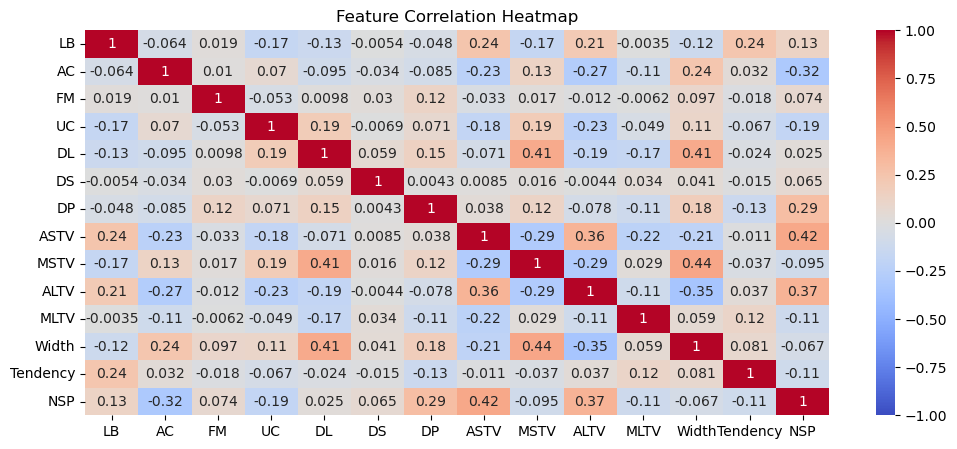

In [11]:
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

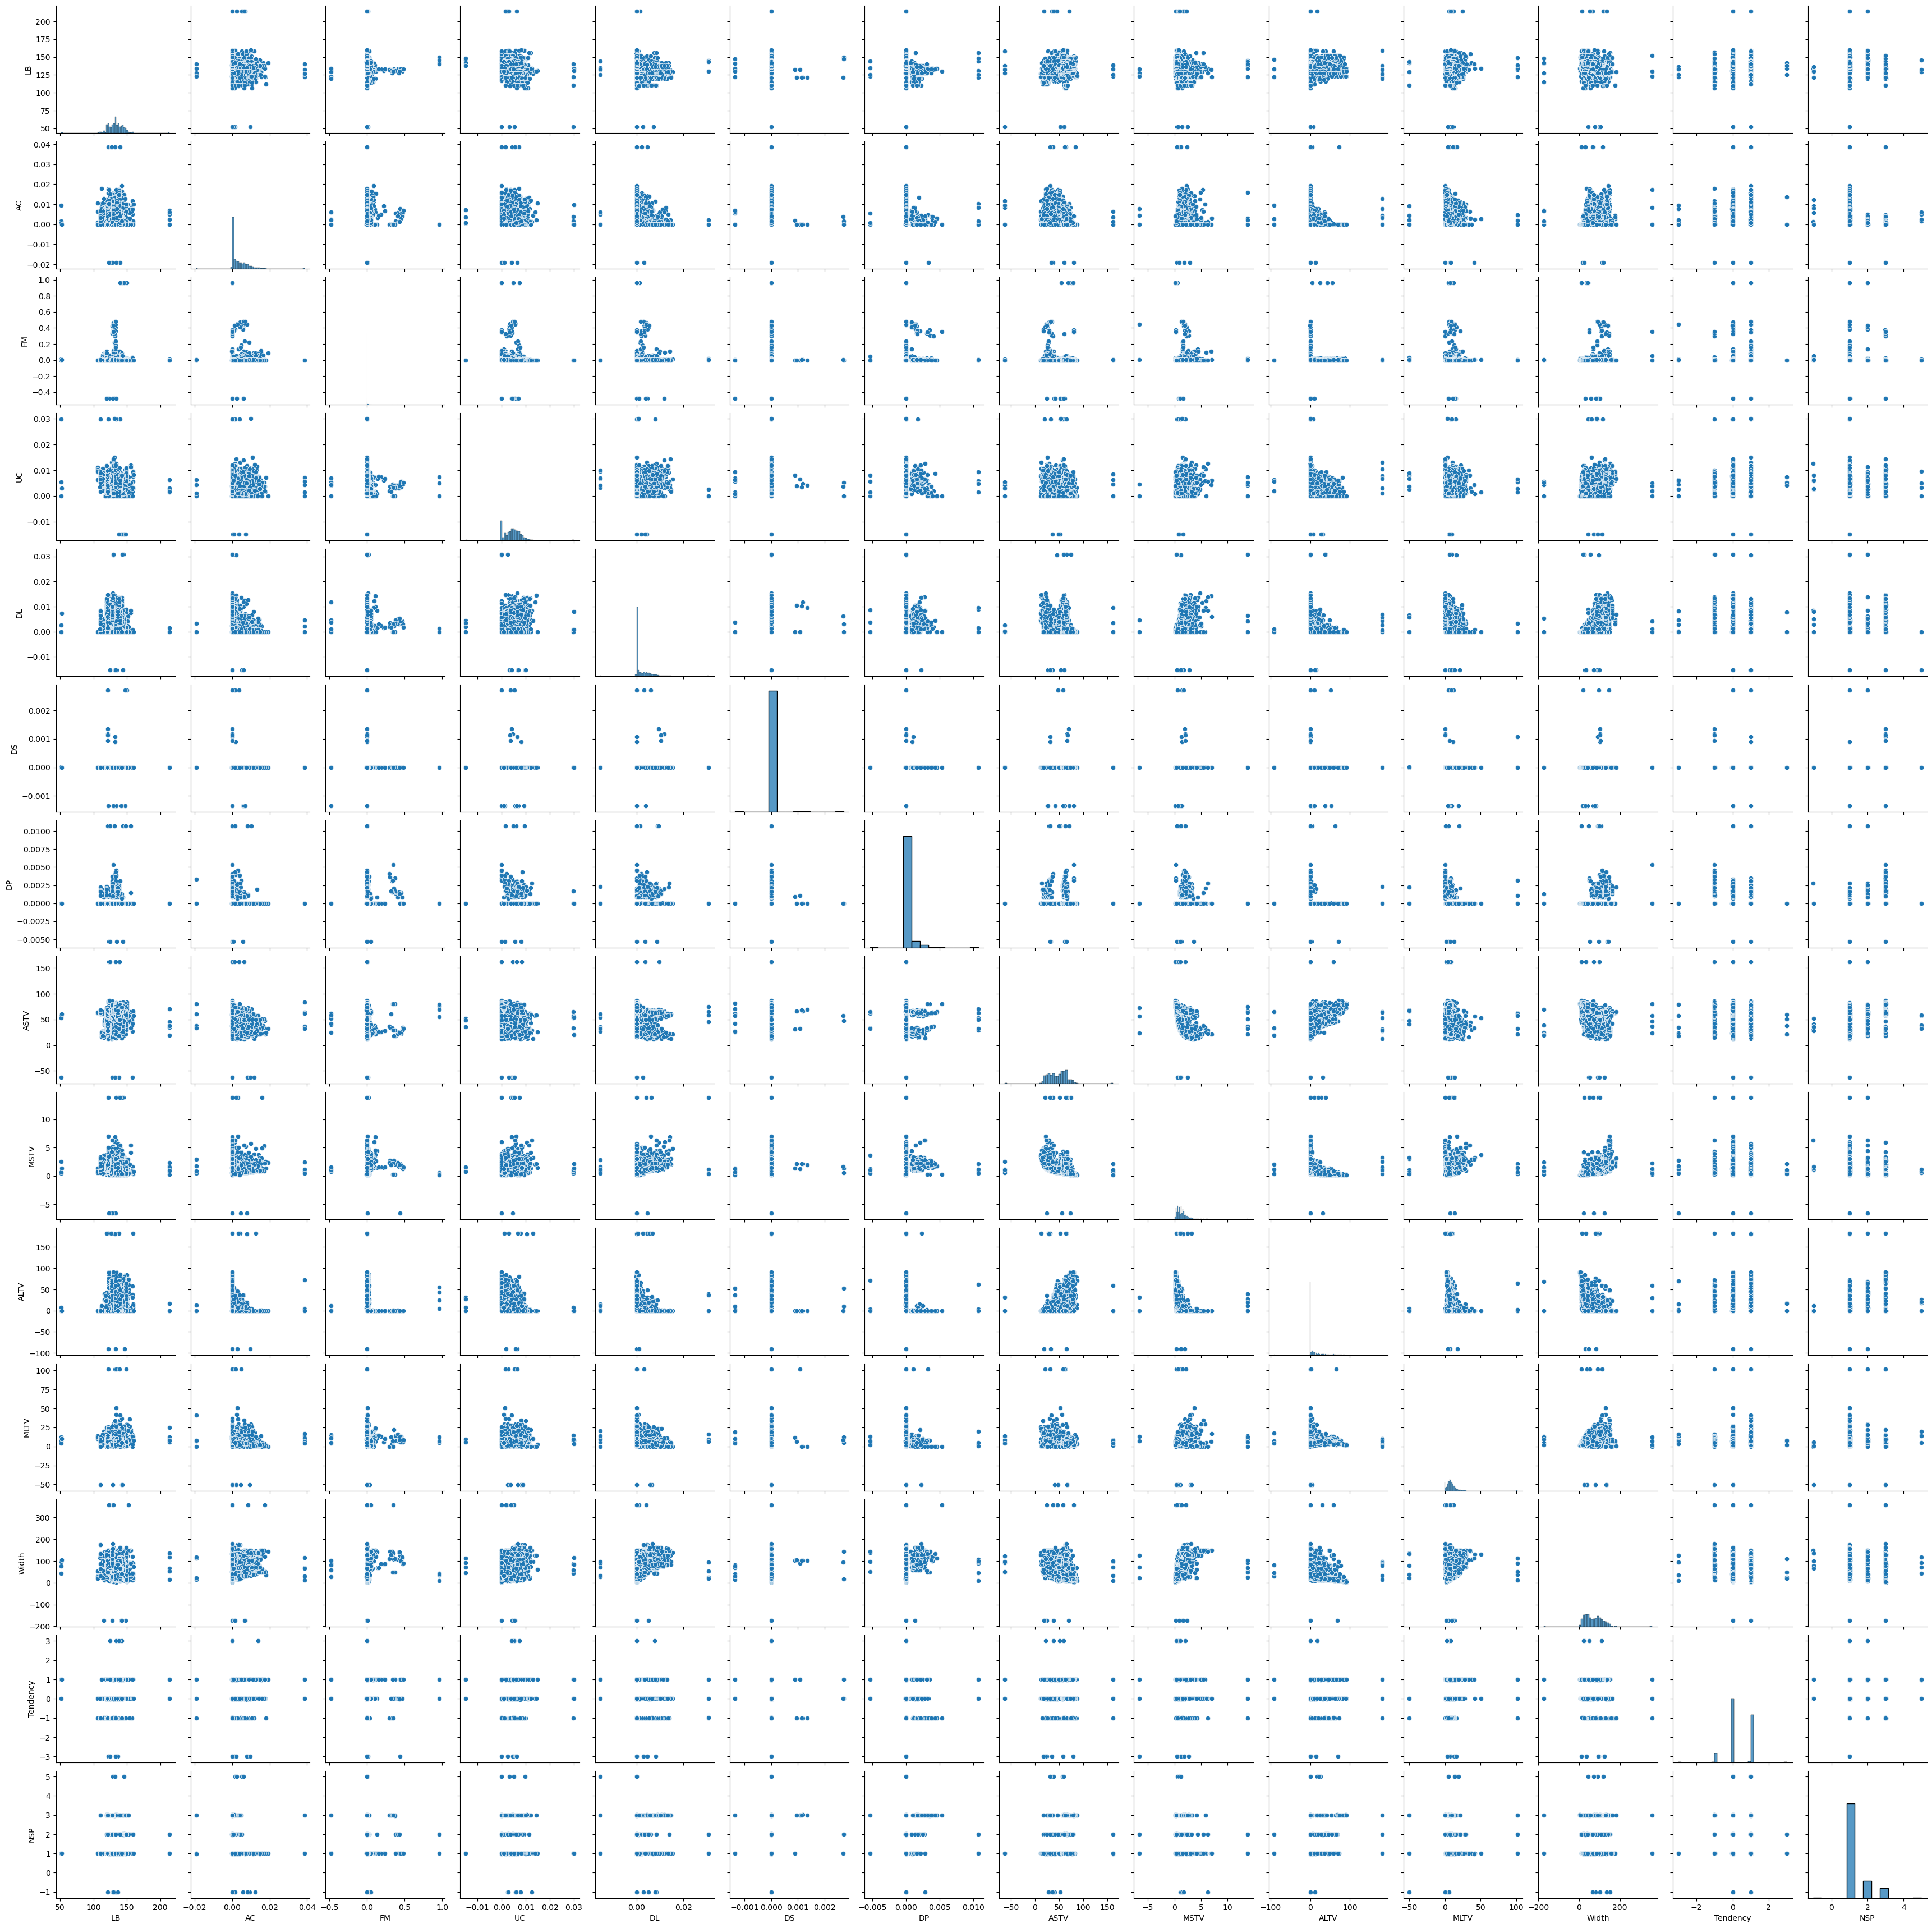

In [12]:
sns.pairplot(data)

The 'Tendency' and 'NSP' columns are categorical but contain continuous data, so they need correction. Additionally, several columns are skewed or not normally distributed. It's essential to check for the presence of outliers and address them to ensure accurate data analysis and model performance.

In [13]:
data.describe()

LB           AC           FM           UC           DL  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean    133.343598     0.003202     0.009963     0.004388     0.001892   
std      11.270154     0.004324     0.067870     0.003350     0.003348   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001838     0.000000   
50%     133.000000     0.001631     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002554     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean      0.000003     0.000175    46.996929     1.361006    10.353647   
std       0.000142     0.000840    18.847737     1.173164    21.282102   
min      -0.001353    -0.005348   -63.000000    -6.600000   -91.000000   
25%       0.000000     0.000000    32.000000     0.700000     0.000000   
50%       0.000000     0.000000    49.000000     1.200000     0.000000   
75%       0.000000     0.000000    61.000000     1.700000    11.000000   
max       0.002706     0.010695   162.000000    13.800000   182.000000   

              MLTV        Width     Tendency          NSP  
count  2105.000000  2105.000000  2105.000000  2105.000000  
mean      8.284887    70.429260     0.316371     1.304507  
std       7.772858    42.931822     0.645622     0.644619  
min     -50.700000  -174.000000    -3.000000    -1.025988  
25%       4.600000    37.000000     0.000000     1.000000  
50%       7.400000    67.000000     0.000000     1.000000  
75%      10.900000   100.000000     1.000000     1.000000  
max     101.400000   357.000000     3.000000     5.000000

The summary statistics :

Continuous Values in Categorical Columns: The 'Tendency' and 'NSP' columns, which are supposed to be categorical, contain continuous values. This indicates a need to convert or correct these columns.

Skewed Data: Many columns have a large difference between their mean and median (50% percentile), which suggests potential skewness.

Outliers: The presence of extreme values, especially visible in the min/max range, indicates possible outliers. These need to be investigated further to determine their impact on analysis.

# LB

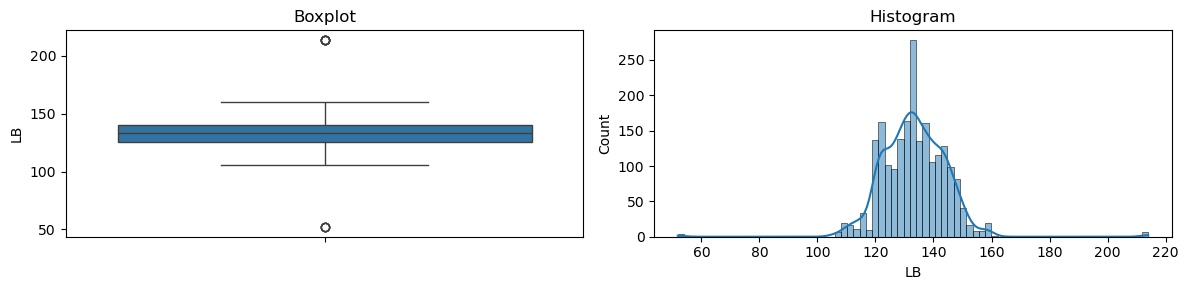

In [14]:
box_hist(data['LB'])

In [15]:
data[data['LB'] < 100]

LB        AC        FM        UC        DL        DS        DP  \
134   52.000000  0.001590  0.000000  0.029851  0.000000  0.000000  0.000003   
785   52.000000  0.000834  0.013344  0.000000  0.000000  0.000000  0.000000   
1027  51.842487  0.009485  0.000000  0.005420  0.002710  0.000005  0.000000   
1834  52.188547  0.000000  0.001043  0.003128  0.007299  0.000000  0.000000   

      ASTV  MSTV  ALTV  MLTV      Width  Tendency  NSP  
134   58.0   0.5   0.0   7.9   44.00000       1.0  1.0  
785   53.0   0.7   8.0  12.0   77.00000       1.0  1.0  
1027 -63.0   2.5   0.0   3.9   98.00000       0.0  1.0  
1834  61.0   1.4   0.0  10.0  105.40169       1.0  1.0

The data is normally distributed, but there are some outliers present, so I need to treat those outliers.

In [16]:
Q3 = data['LB'].quantile(0.95)
Q1 = data['LB'].quantile(0.05)
IQR = Q3-Q1
lower_threshold_LB = Q1 - 1.5*IQR
upper_threshold_LB = Q3 + 1.5*IQR
data['LB'] = data['LB'].apply(lambda x : x if x in range(100,181) 
                              else (lower_threshold_LB if x < lower_threshold_LB else upper_threshold_LB))

I computes the Interquartile Range (IQR) for the LB column and determines outlier thresholds. It then checks if each value falls within a specified range (100-180). If a value is an outlier, it is replaced with either the lower or upper threshold, effectively capping extreme values to treat outliers.

In [17]:
print(lower_threshold_LB,upper_threshold_LB)

74.0 194.0


In [18]:
data['LB'].isnull().sum()

0

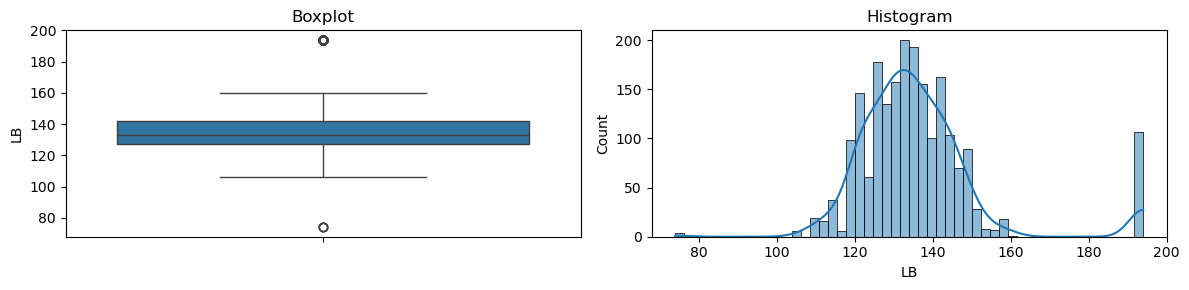

In [19]:
box_hist(data['LB'])

# AC

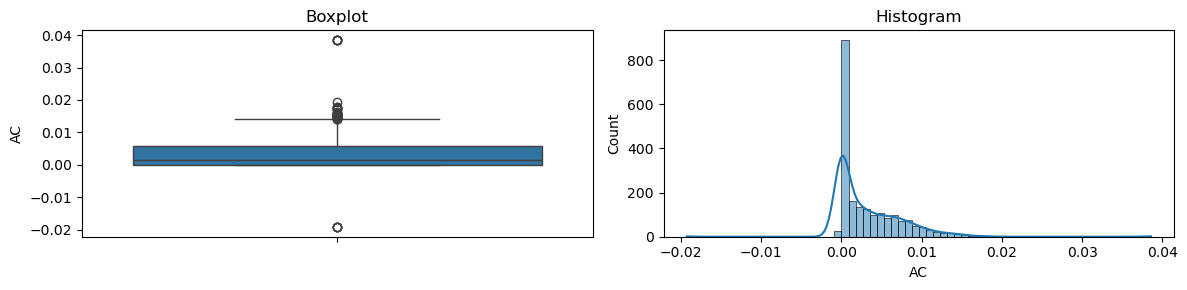

In [20]:
box_hist(data['AC'])

In [21]:
data['AC'] = clipping(data['AC'])
data.describe()

LB           AC           FM           UC           DL  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean    136.190499     0.003143     0.009963     0.004388     0.001892   
std      16.616146     0.003843     0.067870     0.003350     0.003348   
min      74.000000    -0.008475    -0.480634    -0.014925    -0.015393   
25%     127.000000     0.000000     0.000000     0.001838     0.000000   
50%     133.000000     0.001631     0.000000     0.004484     0.000000   
75%     142.000000     0.005650     0.002554     0.006536     0.003289   
max     194.000000     0.014124     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean      0.000003     0.000175    46.996929     1.361006    10.353647   
std       0.000142     0.000840    18.847737     1.173164    21.282102   
min      -0.001353    -0.005348   -63.000000    -6.600000   -91.000000   
25%       0.000000     0.000000    32.000000     0.700000     0.000000   
50%       0.000000     0.000000    49.000000     1.200000     0.000000   
75%       0.000000     0.000000    61.000000     1.700000    11.000000   
max       0.002706     0.010695   162.000000    13.800000   182.000000   

              MLTV        Width     Tendency          NSP  
count  2105.000000  2105.000000  2105.000000  2105.000000  
mean      8.284887    70.429260     0.316371     1.304507  
std       7.772858    42.931822     0.645622     0.644619  
min     -50.700000  -174.000000    -3.000000    -1.025988  
25%       4.600000    37.000000     0.000000     1.000000  
50%       7.400000    67.000000     0.000000     1.000000  
75%      10.900000   100.000000     1.000000     1.000000  
max     101.400000   357.000000     3.000000     5.000000

In [22]:
data['AC'] = np.sqrt(data['AC']+1)
data.describe()

LB           AC           FM           UC           DL  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean    136.190499     1.001568     0.009963     0.004388     0.001892   
std      16.616146     0.001917     0.067870     0.003350     0.003348   
min      74.000000     0.995754    -0.480634    -0.014925    -0.015393   
25%     127.000000     1.000000     0.000000     0.001838     0.000000   
50%     133.000000     1.000815     0.000000     0.004484     0.000000   
75%     142.000000     1.002821     0.002554     0.006536     0.003289   
max     194.000000     1.007037     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean      0.000003     0.000175    46.996929     1.361006    10.353647   
std       0.000142     0.000840    18.847737     1.173164    21.282102   
min      -0.001353    -0.005348   -63.000000    -6.600000   -91.000000   
25%       0.000000     0.000000    32.000000     0.700000     0.000000   
50%       0.000000     0.000000    49.000000     1.200000     0.000000   
75%       0.000000     0.000000    61.000000     1.700000    11.000000   
max       0.002706     0.010695   162.000000    13.800000   182.000000   

              MLTV        Width     Tendency          NSP  
count  2105.000000  2105.000000  2105.000000  2105.000000  
mean      8.284887    70.429260     0.316371     1.304507  
std       7.772858    42.931822     0.645622     0.644619  
min     -50.700000  -174.000000    -3.000000    -1.025988  
25%       4.600000    37.000000     0.000000     1.000000  
50%       7.400000    67.000000     0.000000     1.000000  
75%      10.900000   100.000000     1.000000     1.000000  
max     101.400000   357.000000     3.000000     5.000000

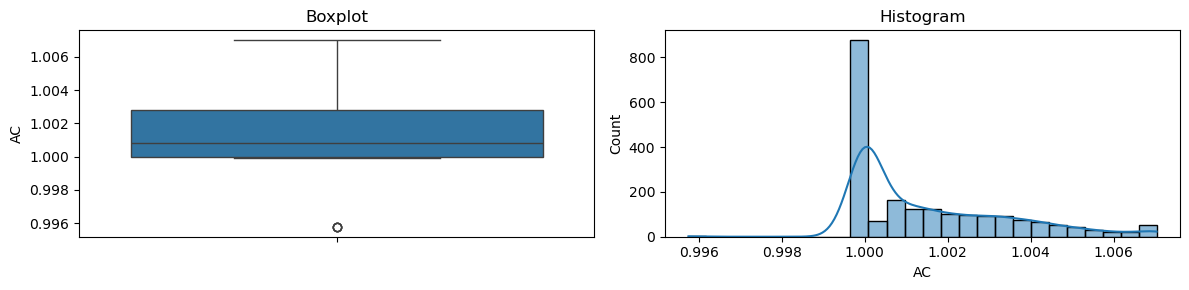

In [23]:
box_hist(data['AC'])


First, outliers in the 'AC' column are clipped using the clipping function to fit within defined thresholds. Then, the square root transformation np.sqrt(data['AC'] + 1) is applied, adjusting the data to reduce skewness and stabilize variance, often enhancing model performance.

# FM

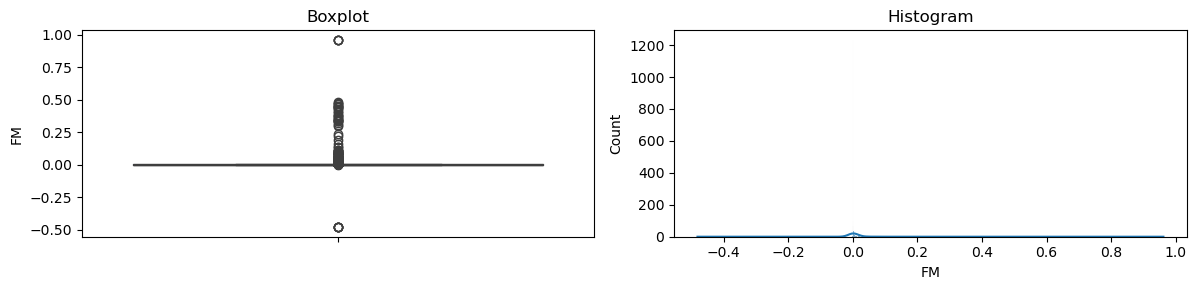

In [24]:
box_hist(data['FM'])

In [25]:
data['FM'].value_counts()

FM
 0.000000    1221
 0.000834      10
 0.001668       9
 0.003336       9
 0.005838       7
             ... 
 0.071269       1
 0.060219       1
 0.001947       1
 0.001229       1
-0.000188       1
Name: count, Length: 769, dtype: int64

In [26]:
data.drop(columns="FM",inplace=True)

The 'FM' column shows a large number of repeated values with few unique counts. Dropping this column is justified as it provides minimal unique information and contributes little to model performance. It reduces dimensionality and avoids potential noise, focusing on more informative features.

# UC

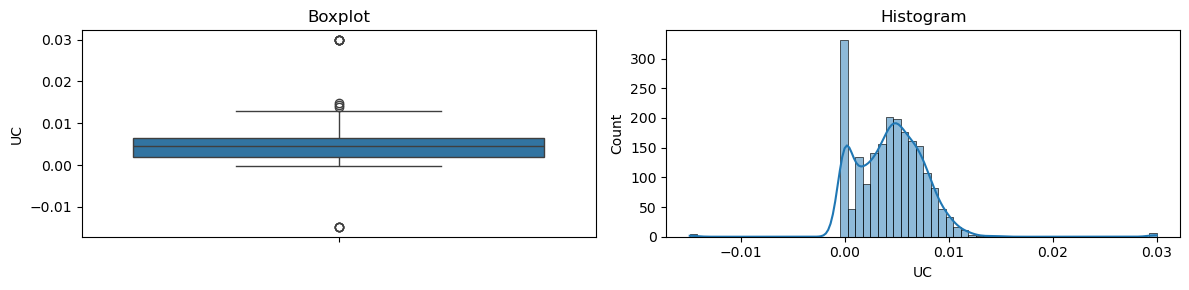

In [27]:
box_hist(data['UC'])

In [28]:
data['UC'] = clipping(data['UC'])

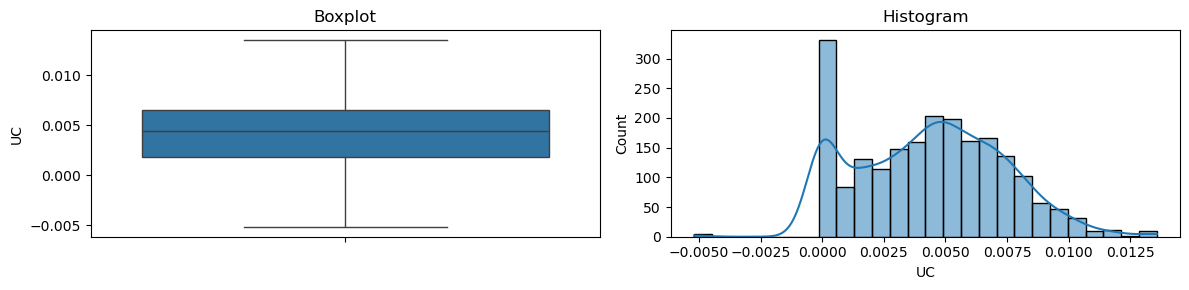

In [29]:
box_hist(data['UC'])

outliers in the 'UC' column are clipped using the clipping function to fit within defined thresholds. 

# DL

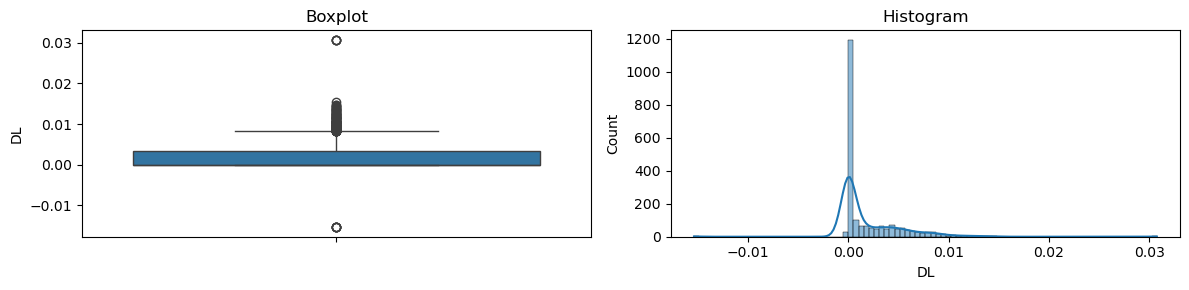

In [30]:
box_hist(data['DL'])

In [31]:
data['DL'] = clipping(data['DL']) 

In [32]:
data['DL'] = np.sqrt(data['DL']+1)

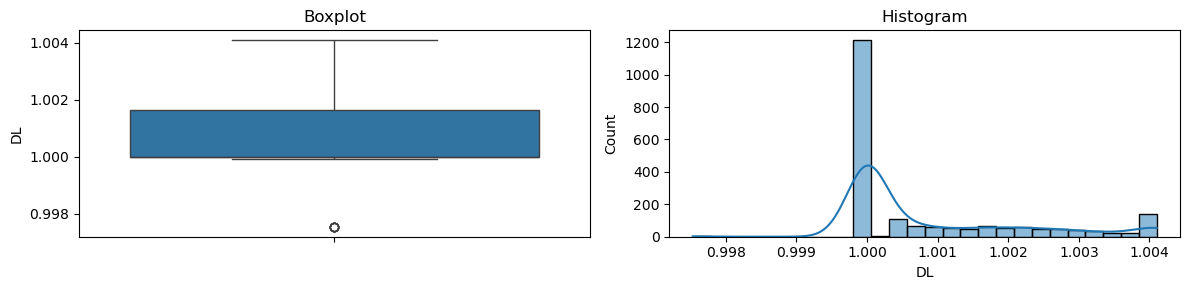

In [33]:
box_hist(data['DL'])

In [34]:
data['DL'].value_counts()

DL
1.000000    1158
1.004103     118
1.000417      22
0.997530       6
1.000834       6
            ... 
1.002470       1
1.001702       1
1.002327       1
1.001388       1
1.000622       1
Name: count, Length: 701, dtype: int64

The clipping function adjusts 'DL' values to fit within specified thresholds, and np.sqrt(data['DL'] + 1) transforms the data. The resulting value_counts() show that most values are clustered around 1.

# DS AND DP

In [35]:
data.describe()

LB           AC           UC           DL           DS  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean    136.190499     1.001568     0.004358     1.000883     0.000003   
std      16.616146     0.001917     0.003008     0.001334     0.000142   
min      74.000000     0.995754    -0.005209     0.997530    -0.001353   
25%     127.000000     1.000000     0.001838     1.000000     0.000000   
50%     133.000000     1.000815     0.004484     1.000000     0.000000   
75%     142.000000     1.002821     0.006536     1.001643     0.000000   
max     194.000000     1.007037     0.013583     1.004103     0.002706   

                DP         ASTV         MSTV         ALTV         MLTV  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean      0.000175    46.996929     1.361006    10.353647     8.284887   
std       0.000840    18.847737     1.173164    21.282102     7.772858   
min      -0.005348   -63.000000    -6.600000   -91.000000   -50.700000   
25%       0.000000    32.000000     0.700000     0.000000     4.600000   
50%       0.000000    49.000000     1.200000     0.000000     7.400000   
75%       0.000000    61.000000     1.700000    11.000000    10.900000   
max       0.010695   162.000000    13.800000   182.000000   101.400000   

             Width     Tendency          NSP  
count  2105.000000  2105.000000  2105.000000  
mean     70.429260     0.316371     1.304507  
std      42.931822     0.645622     0.644619  
min    -174.000000    -3.000000    -1.025988  
25%      37.000000     0.000000     1.000000  
50%      67.000000     0.000000     1.000000  
75%     100.000000     1.000000     1.000000  
max     357.000000     3.000000     5.000000

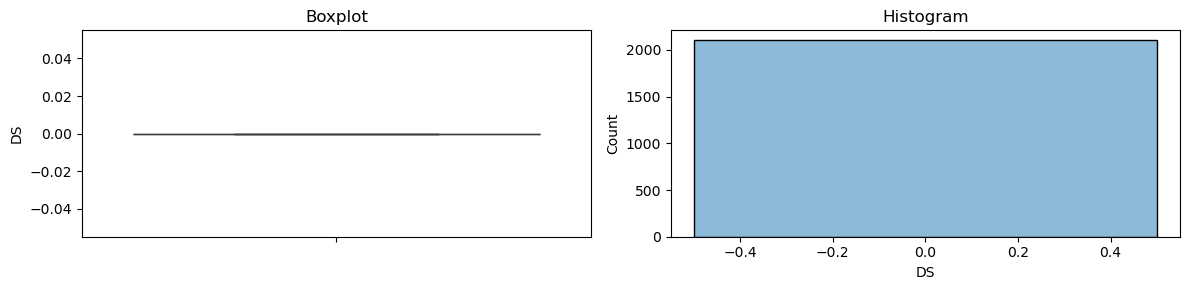

In [36]:
box_hist(clipping(data['DS']))

In [37]:
data['DS'].value_counts()

DS
 0.000000e+00    1985
-1.353180e-03       7
 2.706360e-03       2
 1.078749e-03       1
 1.428324e-06       1
                 ... 
-2.900000e-06       1
 4.565852e-06       1
 1.354294e-08       1
-2.510000e-06       1
 9.488398e-07       1
Name: count, Length: 114, dtype: int64

In [38]:
data['DP'].value_counts()

DP
 0.000000    1821
 0.010695       6
-0.005348       4
 0.000834       3
-0.000015       2
             ... 
 0.001221       1
-0.000002       1
-0.000034       1
 0.000013       1
 0.002174       1
Name: count, Length: 264, dtype: int64

In [39]:
data.drop(columns=['DS','DP'],inplace=True)

The 'DL' and 'DS' columns exhibit high counts for a few repeated values, with many unique but infrequent entries. This limited variance and clustering around specific values suggest they offer little distinct information. Dropping these columns simplifies the dataset and focuses on more informative features.

In [40]:
data.describe()

LB           AC           UC           DL         ASTV  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean    136.190499     1.001568     0.004358     1.000883    46.996929   
std      16.616146     0.001917     0.003008     0.001334    18.847737   
min      74.000000     0.995754    -0.005209     0.997530   -63.000000   
25%     127.000000     1.000000     0.001838     1.000000    32.000000   
50%     133.000000     1.000815     0.004484     1.000000    49.000000   
75%     142.000000     1.002821     0.006536     1.001643    61.000000   
max     194.000000     1.007037     0.013583     1.004103   162.000000   

              MSTV         ALTV         MLTV        Width     Tendency  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean      1.361006    10.353647     8.284887    70.429260     0.316371   
std       1.173164    21.282102     7.772858    42.931822     0.645622   
min      -6.600000   -91.000000   -50.700000  -174.000000    -3.000000   
25%       0.700000     0.000000     4.600000    37.000000     0.000000   
50%       1.200000     0.000000     7.400000    67.000000     0.000000   
75%       1.700000    11.000000    10.900000   100.000000     1.000000   
max      13.800000   182.000000   101.400000   357.000000     3.000000   

               NSP  
count  2105.000000  
mean      1.304507  
std       0.644619  
min      -1.025988  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       5.000000

# ASTV

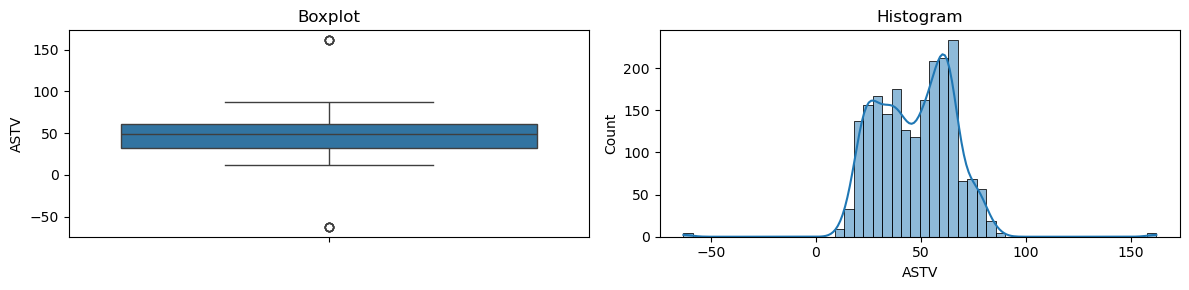

In [41]:
box_hist(data['ASTV'])

In [42]:
# data['ASTV'] = clipping(data['ASTV'])
Q3 = data['ASTV'].quantile(0.95)
Q1 = data['ASTV'].quantile(0.05)
#IQR = Q3-Q1
lower_threshold = Q1 #- 1.5*IQR
upper_threshold = Q3 #+ 1.5*IQR
data['ASTV'] = data['ASTV'].apply(lambda x : x if x in range(0,101) 
                              else (lower_threshold if x < lower_threshold else upper_threshold))

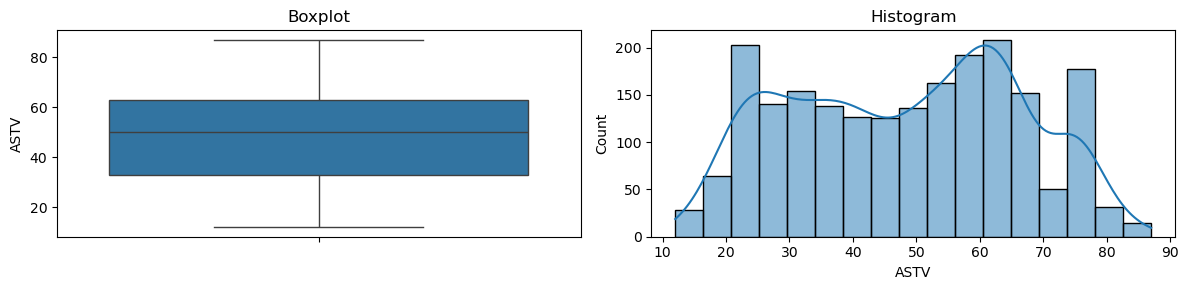

In [43]:
box_hist(data['ASTV'])

The code sets thresholds for 'ASTV' using the 5th and 95th percentiles. It clips 'ASTV' values to lie within the range [0, 100], replacing values outside this range with the nearest threshold (0 or 100). This approach restricts data to a specific range without using IQR.

# MSTV

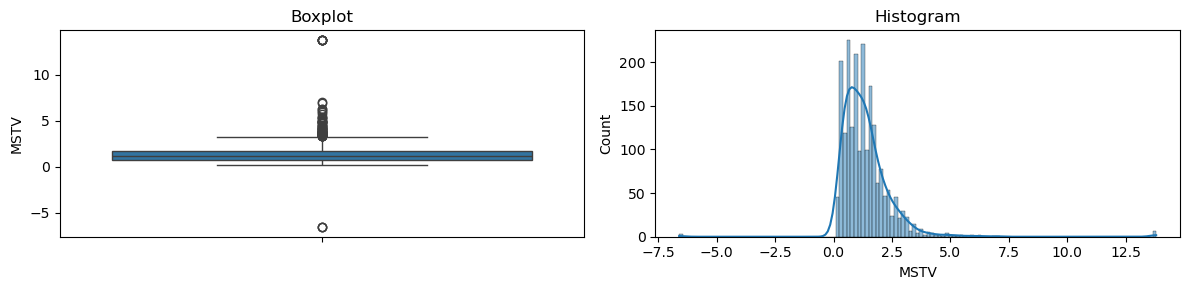

In [44]:
box_hist(data['MSTV'])

In [45]:
data['MSTV'] = clipping(data['MSTV'])

In [46]:
data['MSTV'] = np.sqrt(data['MSTV']+1)

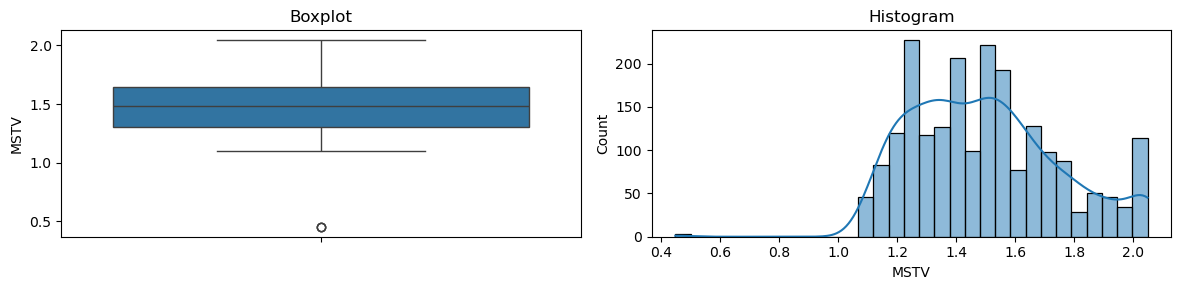

In [47]:
box_hist(data['MSTV'])

The 'MSTV' column is first clipped to handle outliers by bounding values within specified thresholds. Then, a square root transformation np.sqrt(data['MSTV'] + 1) is applied to reduce skewness and stabilize variance, enhancing the data’s distribution for better model performance.

# ALTV

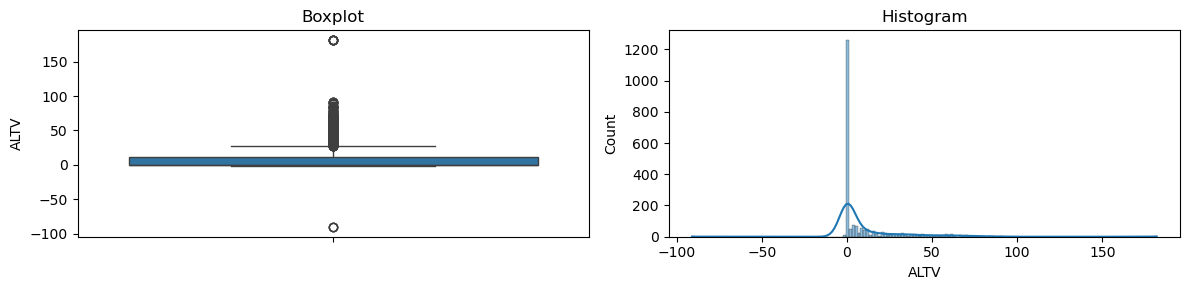

In [48]:
box_hist(data['ALTV'])

In [49]:
data['ALTV'] = np.sqrt(clipping(data['ALTV'])+1)

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [50]:
data['ALTV'].isnull().sum()

4

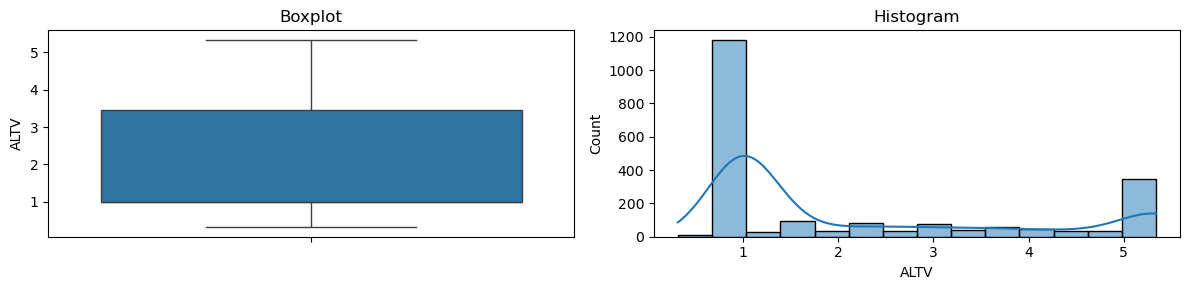

In [51]:
box_hist(data['ALTV'])

The 'ALTV' column is first clipped to handle outliers by bounding values within specified thresholds. Then, the natural logarithm transformation np.log(data['ALTV'] + 1) is applied to normalize the data, reduce skewness, and stabilize variance, improving its suitability for modeling.

# MLTV

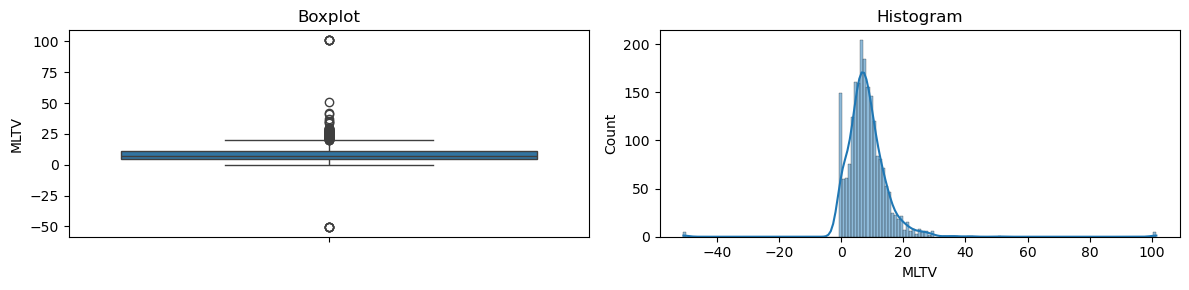

In [52]:
box_hist(data['MLTV'])

In [53]:
data['MLTV'] = clipping(data['MLTV'])

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


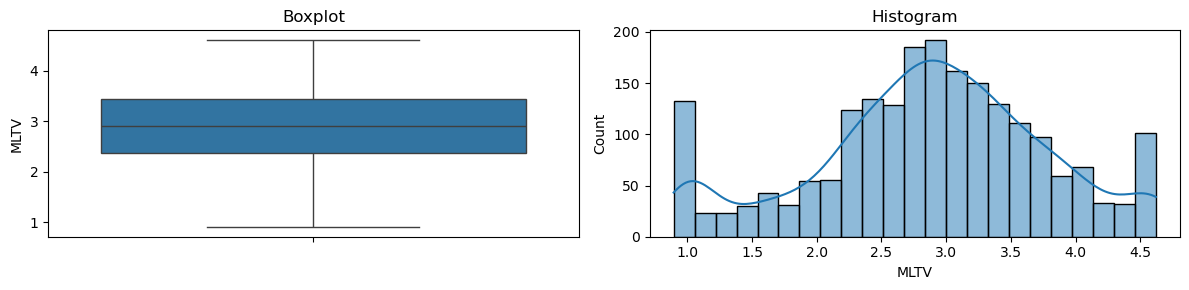

In [54]:
box_hist(np.sqrt(data['MLTV']+1))

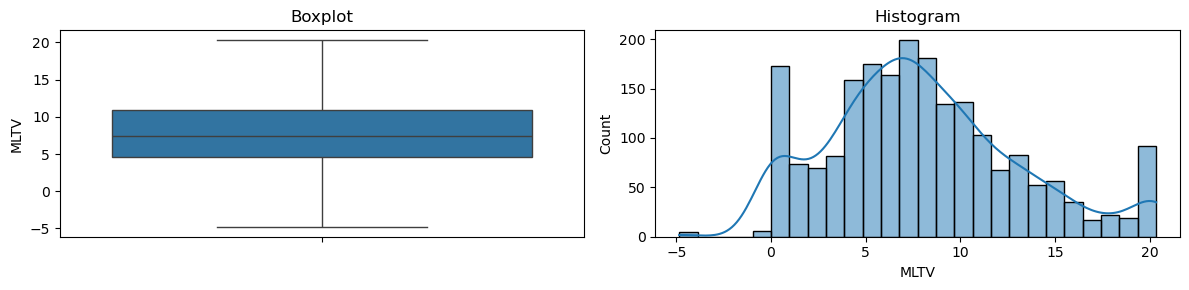

In [55]:
box_hist(data['MLTV'])

The clipping(data['MLTV']) function adjusts 'MLTV' values to fall within defined thresholds, replacing outliers with the nearest valid threshold values.

# Width 

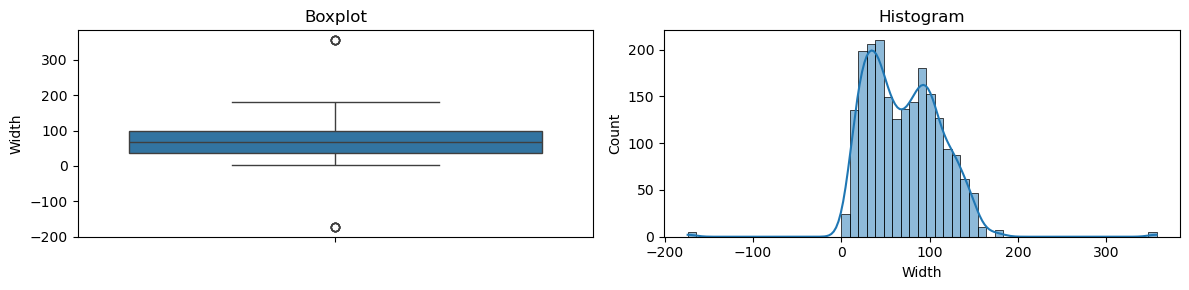

In [56]:
box_hist(data['Width'])

In [57]:
data['Width'] = clipping(data['Width'])

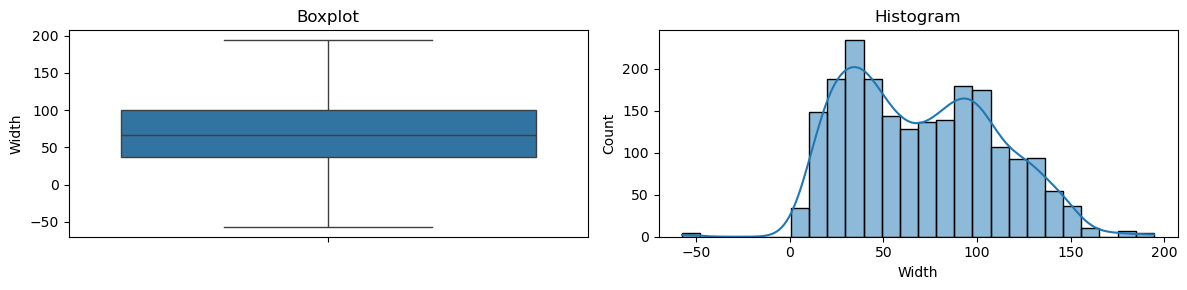

In [58]:
box_hist(data['Width'])

The clipping(data['Width']) function adjusts 'Width' values to fall within defined thresholds, replacing outliers with the nearest valid threshold values.

# Tendency

In [59]:
data['Tendency'].value_counts()

Tendency
 0.000000    1037
 1.000000     804
-1.000000     149
-3.000000       5
 3.000000       4
             ... 
-0.018994       1
-0.019886       1
-0.026640       1
-0.009974       1
 1.002932       1
Name: count, Length: 111, dtype: int64

In [60]:
data['Tendency'] = data['Tendency'].apply(lambda x:x if x==0 or x==1 or x== -1 
                                          else(-1 if x < -0.5 else(0 if -0.5 <= x <= 0.5 else 1)))

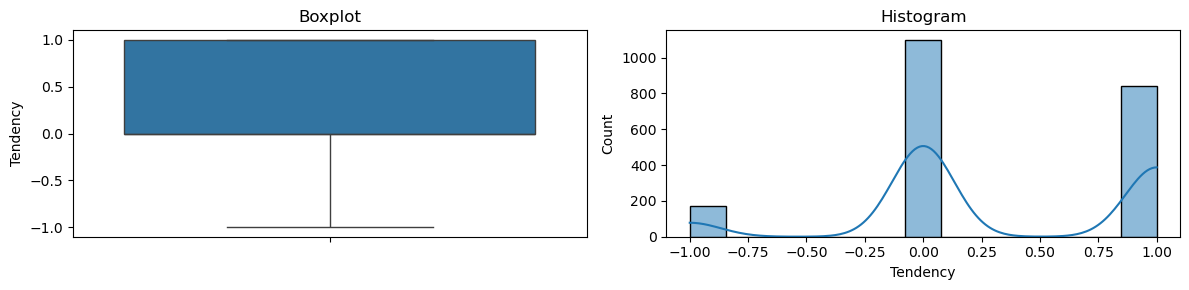

In [61]:
box_hist(data['Tendency'])

Because of 'Tendency' look like categorical column, i maps 'Tendency' values to discrete categories: -1, 0, or 1. Values are adjusted based on conditions: less than -0.5 to -1, between -0.5 and 0.5 to 0, and greater than 0.5 to 1.

In [62]:
data.describe()

LB           AC           UC           DL         ASTV  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean    136.190499     1.001568     0.004358     1.000883    48.259857   
std      16.616146     0.001917     0.003008     0.001334    17.900853   
min      74.000000     0.995754    -0.005209     0.997530    12.000000   
25%     127.000000     1.000000     0.001838     1.000000    33.000000   
50%     133.000000     1.000815     0.004484     1.000000    50.000000   
75%     142.000000     1.002821     0.006536     1.001643    63.000000   
max     194.000000     1.007037     0.013583     1.004103    87.000000   

              MSTV         ALTV         MLTV        Width     Tendency  \
count  2105.000000  2101.000000  2105.000000  2105.000000  2105.000000   
mean      1.496356     2.214243     8.022202    70.319997     0.318290   
std       0.250908     1.691869     5.094420    39.767619     0.614598   
min       0.447214     0.316432    -4.850000   -57.500000    -1.000000   
25%       1.303840     1.000000     4.600000    37.000000     0.000000   
50%       1.483240     1.000000     7.400000    67.000000     0.000000   
75%       1.643168     3.464102    10.900000   100.000000     1.000000   
max       2.049390     5.338539    20.350000   194.500000     1.000000   

               NSP  
count  2105.000000  
mean      1.304507  
std       0.644619  
min      -1.025988  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       5.000000

# NSP

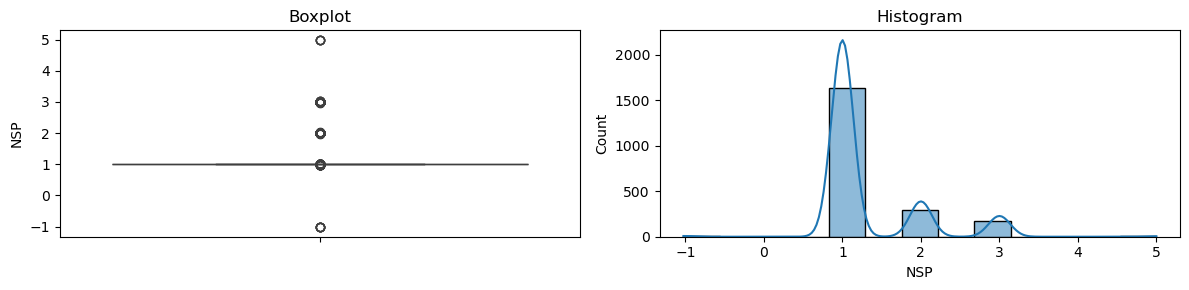

In [63]:
box_hist(data['NSP'])

In [64]:
data['NSP'].value_counts()

NSP
 1.000000    1546
 2.000000     280
 3.000000     164
-1.000000       5
 5.000000       4
             ... 
 0.992847       1
 2.971309       1
 0.984834       1
 0.991200       1
 1.990464       1
Name: count, Length: 111, dtype: int64

In [65]:
data['NSP'] = data['NSP'].apply(lambda x: 0 if x < 0.5 else (1 if 0.5 <= x < 1.5 else (2 if 1.5 <= x < 2.5 else 3)))

print(data['NSP'].value_counts())

NSP
1    1630
2     293
3     176
0       6
Name: count, dtype: int64


ransforms the 'NSP' column into categorical values based on ranges: values below 0.5 are set to 0, between 0.5 and 1.5 to 1, between 1.5 and 2.5 to 2, and above 2.5 to 3. The value_counts() will show the distribution of these categories in the target column.

In [66]:
data.describe()

LB           AC           UC           DL         ASTV  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean    136.190499     1.001568     0.004358     1.000883    48.259857   
std      16.616146     0.001917     0.003008     0.001334    17.900853   
min      74.000000     0.995754    -0.005209     0.997530    12.000000   
25%     127.000000     1.000000     0.001838     1.000000    33.000000   
50%     133.000000     1.000815     0.004484     1.000000    50.000000   
75%     142.000000     1.002821     0.006536     1.001643    63.000000   
max     194.000000     1.007037     0.013583     1.004103    87.000000   

              MSTV         ALTV         MLTV        Width     Tendency  \
count  2105.000000  2101.000000  2105.000000  2105.000000  2105.000000   
mean      1.496356     2.214243     8.022202    70.319997     0.318290   
std       0.250908     1.691869     5.094420    39.767619     0.614598   
min       0.447214     0.316432    -4.850000   -57.500000    -1.000000   
25%       1.303840     1.000000     4.600000    37.000000     0.000000   
50%       1.483240     1.000000     7.400000    67.000000     0.000000   
75%       1.643168     3.464102    10.900000   100.000000     1.000000   
max       2.049390     5.338539    20.350000   194.500000     1.000000   

               NSP  
count  2105.000000  
mean      1.303563  
std       0.620094  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       3.000000

In [67]:
data.drop_duplicates(inplace=True) # drop all duplicate values 

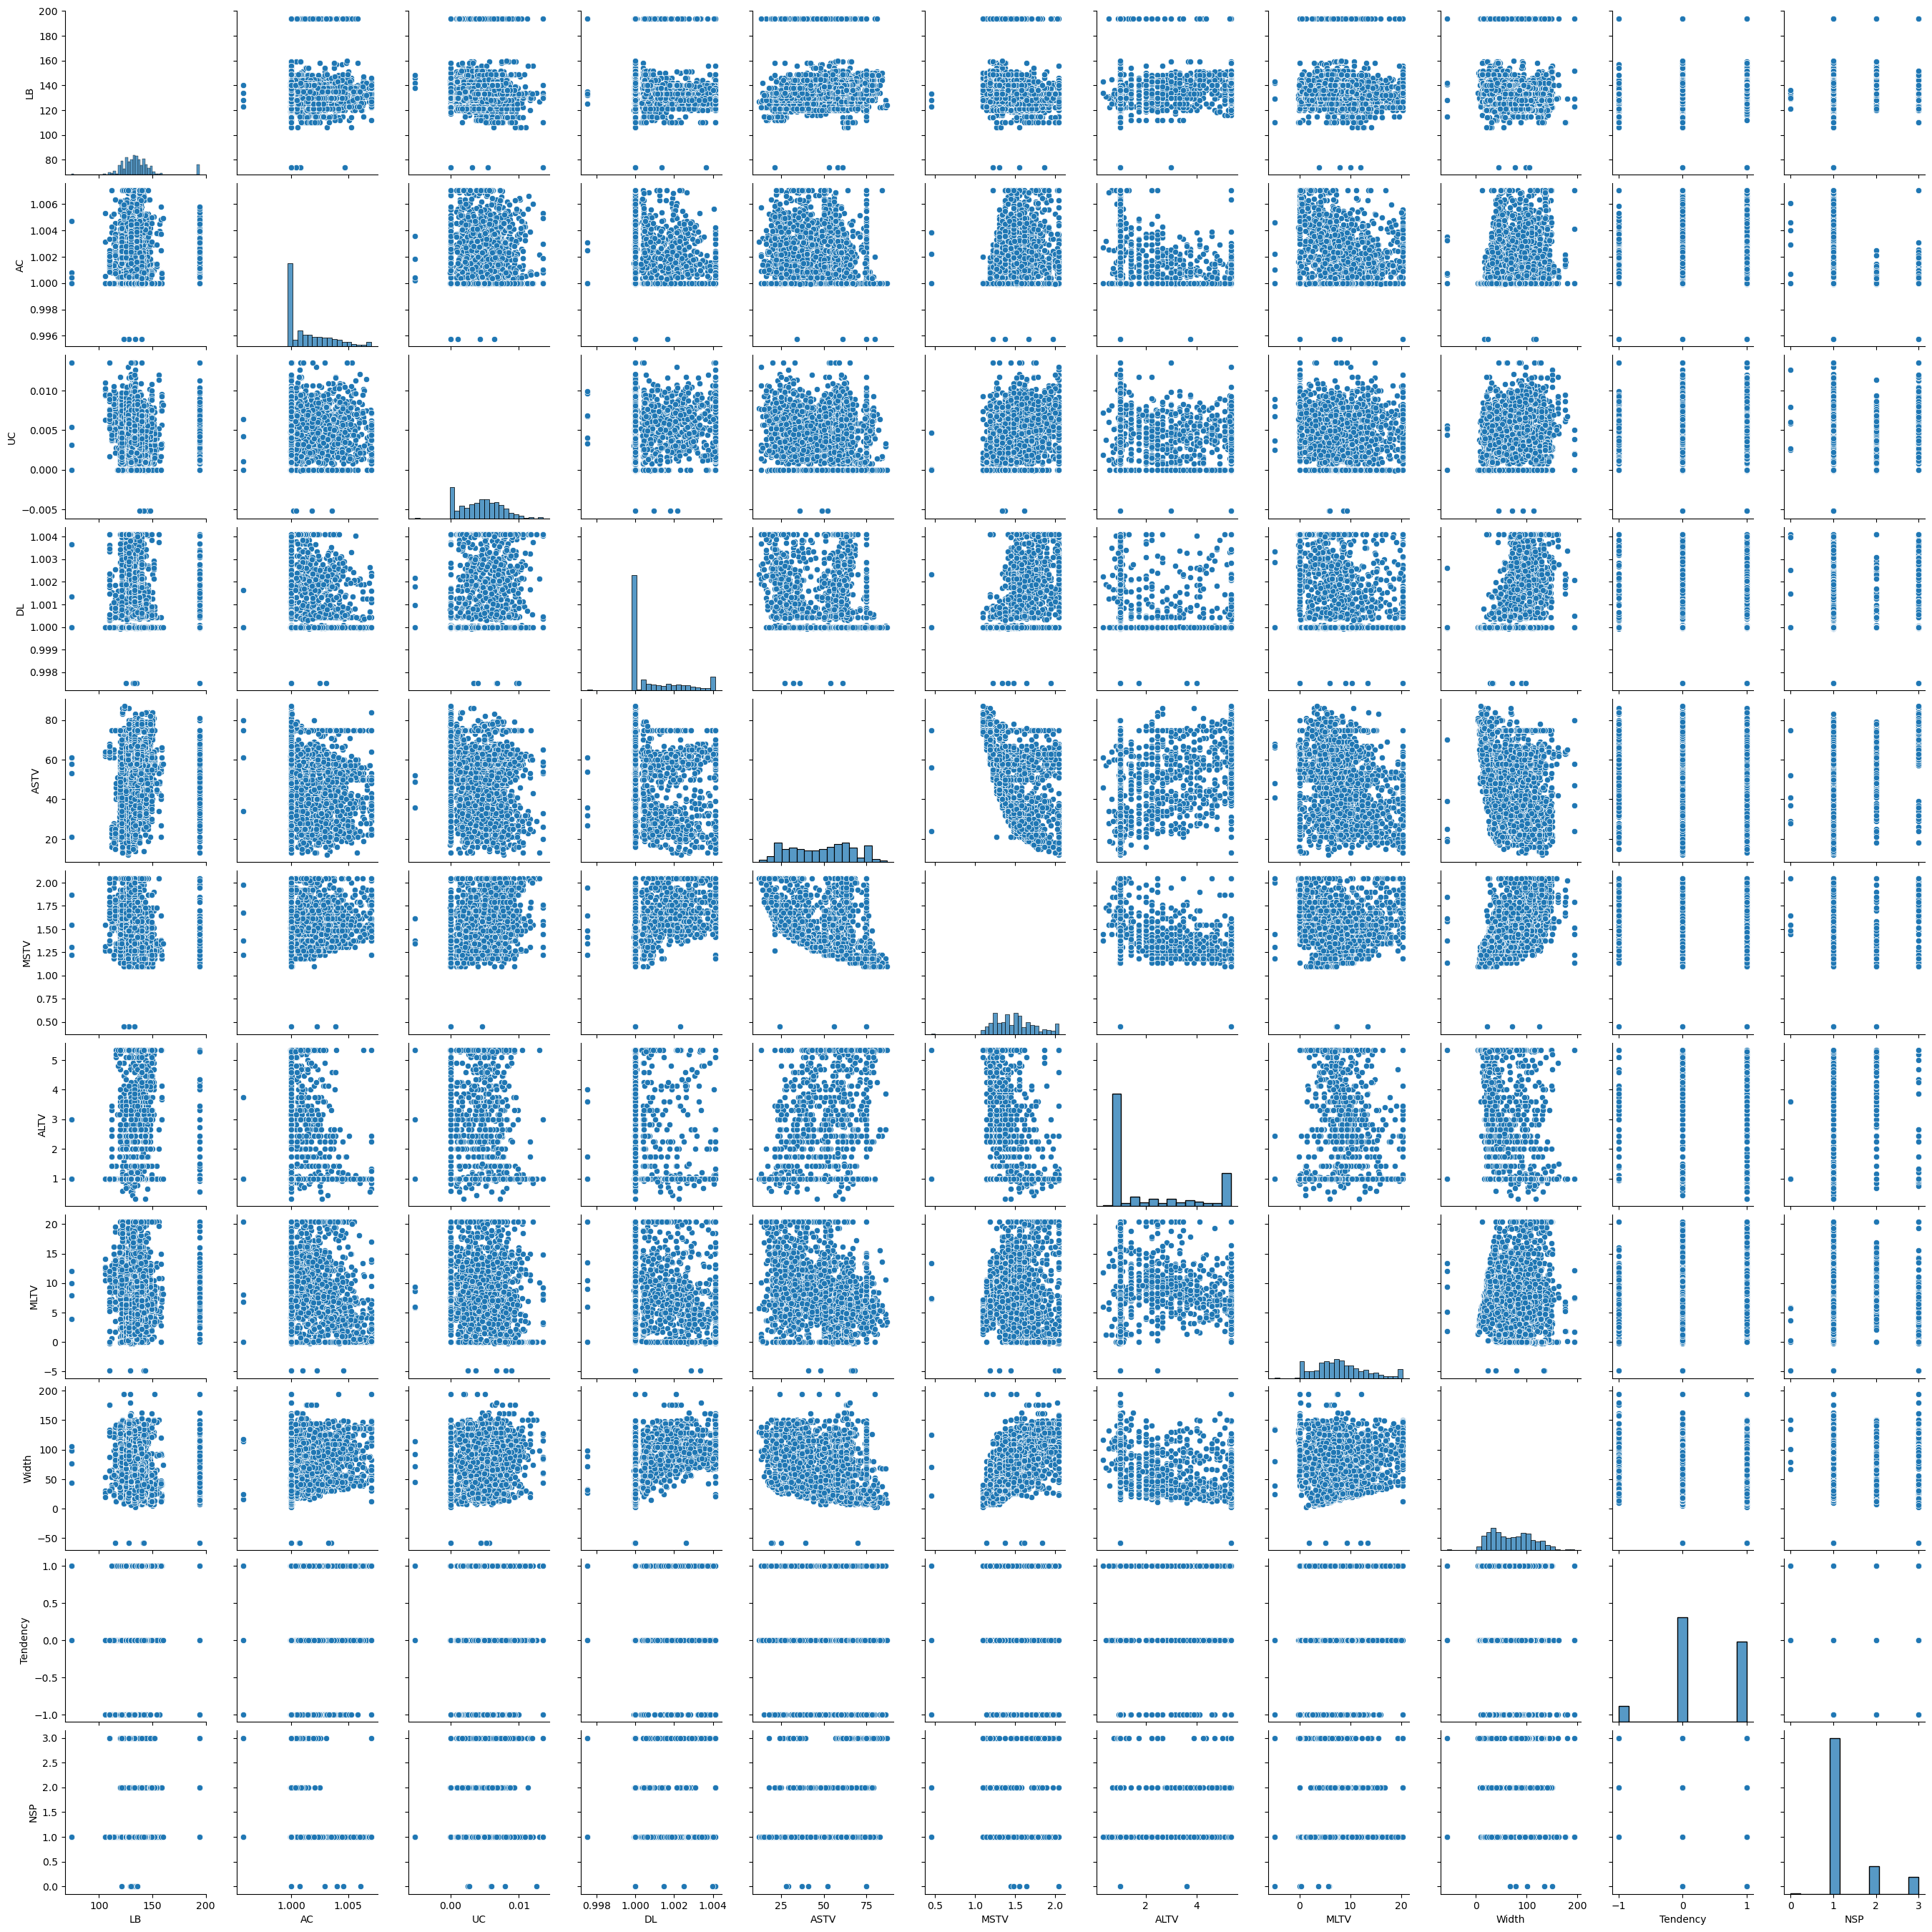

In [68]:
sns.pairplot(data)

In [69]:
correlation = data.corr()
correlation

LB        AC        UC        DL      ASTV      MSTV  \
LB        1.000000 -0.046856 -0.098960 -0.108991  0.172091 -0.201907   
AC       -0.046856  1.000000  0.090643 -0.104517 -0.253078  0.239846   
UC       -0.098960  0.090643  1.000000  0.269377 -0.205977  0.315054   
DL       -0.108991 -0.104517  0.269377  1.000000 -0.106153  0.564482   
ASTV      0.172091 -0.253078 -0.205977 -0.106153  1.000000 -0.437823   
MSTV     -0.201907  0.239846  0.315054  0.564482 -0.437823  1.000000   
ALTV      0.196043 -0.432180 -0.297494 -0.321965  0.416408 -0.596809   
MLTV     -0.011769 -0.151208 -0.071026 -0.241369 -0.321435  0.022932   
Width    -0.082530  0.284859  0.131919  0.516797 -0.218265  0.660901   
Tendency  0.155253  0.031098 -0.075980  0.016134 -0.010388 -0.055135   
NSP       0.106742 -0.362004 -0.207192  0.024879  0.445572 -0.162796   

              ALTV      MLTV     Width  Tendency       NSP  
LB        0.196043 -0.011769 -0.082530  0.155253  0.106742  
AC       -0.432180 -0.151208  0.284859  0.031098 -0.362004  
UC       -0.297494 -0.071026  0.131919 -0.075980 -0.207192  
DL       -0.321965 -0.241369  0.516797  0.016134  0.024879  
ASTV      0.416408 -0.321435 -0.218265 -0.010388  0.445572  
MSTV     -0.596809  0.022932  0.660901 -0.055135 -0.162796  
ALTV      1.000000 -0.105167 -0.460298  0.056378  0.337613  
MLTV     -0.105167  1.000000  0.075561  0.147493 -0.217848  
Width    -0.460298  0.075561  1.000000  0.104989 -0.074945  
Tendency  0.056378  0.147493  0.104989  1.000000 -0.124145  
NSP       0.337613 -0.217848 -0.074945 -0.124145  1.000000

In [70]:
data.columns

Index(['LB', 'AC', 'UC', 'DL', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width',
       'Tendency', 'NSP'],
      dtype='object')

In [71]:

data_test = data.drop(columns=[ 'AC','Width'])
# data_test['new'] = (data['Width']+data['DL']+data['MSTV'])/3

In [72]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2098 entries, 0 to 2125
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2098 non-null   float64
 1   UC        2098 non-null   float64
 2   DL        2098 non-null   float64
 3   ASTV      2098 non-null   float64
 4   MSTV      2098 non-null   float64
 5   ALTV      2094 non-null   float64
 6   MLTV      2098 non-null   float64
 7   Tendency  2098 non-null   float64
 8   NSP       2098 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 163.9 KB


In [73]:
data[data.isnull().any(axis=1)]

LB        AC        UC        DL  ASTV      MSTV  ALTV  MLTV  Width  \
559   130.0  1.002172  0.004348  1.002172  35.0  1.949359   NaN  11.6  144.0   
802   194.0  1.000000  0.006369  1.000000  65.0  1.183216   NaN   7.4   30.0   
1068  133.0  1.004778  0.005747  1.000000  33.0  1.483240   NaN   4.4   82.0   
1105  122.0  1.001398  0.001866  1.000466  19.0  1.732051   NaN  17.7   46.0   

      Tendency  NSP  
559        0.0    1  
802        0.0    2  
1068       1.0    1  
1105       0.0    1

In [74]:
data_test.fillna(value=data['ALTV'].mean(),inplace=True)

In [75]:
data_test.shape

(2098, 9)


The code data_test.fillna(value=data['ALTV'].mean, inplace=True) fills all missing values in ALTV column with the mean of the ALTV column from data.

Then i am going to splits the data_test DataFrame into features (X) and target (y), where NSP is the target variable. It then divides the data into training and testing sets, with 30% of the data allocated to testing and the remaining 70% to training. The random_state=42 ensures reproducibility.

In [139]:
X = data_test.drop(columns='NSP')
y = data_test['NSP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
len(X_test)

630

In [140]:
scaler = MinMaxScaler()
model = LogisticRegression()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
smote = SMOTE(k_neighbors=3, random_state=42)  # Adjust k_neighbors to be less than the number of minority class samples
X_train, y_train = smote.fit_resample(X_train, y_train)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.95      0.60      0.73       477
           2       0.51      0.77      0.61       103
           3       0.26      0.62      0.37        48

    accuracy                           0.63       630
   macro avg       0.43      0.50      0.43       630
weighted avg       0.82      0.63      0.68       630



I normalizes features using MinMaxScaler, initializes a logistic regression model, and applies SMOTE to address class imbalance.

Class 0: Poor performance.

Class 1: High precision (0.95), good recall (0.60), F1-score (0.74).

Class 2: Balanced recall (0.76) and F1-score (0.61).

Class 3: Lower precision (0.26) and F1-score (0.37).

Accuracy: 0.63, with better weighted averages.

The Accuracy is very low So, I am going to use random forest algorithm

In [78]:
print(confusion_matrix(y_test,y_pred))

[[  0   1   0   1]
 [ 55 286  63  73]
 [  3  11  79  10]
 [  2   4  12  30]]


In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rfc = RandomForestClassifier(n_estimators=100,criterion='entropy',n_jobs=-1)

In [81]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.93      0.96      0.94       477
           2       0.81      0.69      0.74       103
           3       0.76      0.79      0.78        48

    accuracy                           0.90       630
   macro avg       0.62      0.61      0.62       630
weighted avg       0.89      0.90      0.89       630



Class 0: Poor performance.

Class 1: Excellent precision (0.93), recall (0.96), and F1-score (0.95).

Class 2: Good precision (0.81) and recall (0.72), with F1-score (0.76).

Class 3: High recall (0.77) and precision (0.74), F1-score (0.76).

Accuracy: 0.90

The accuracy is better than logistic regression model

In [82]:
print(confusion_matrix(y_test,y_pred))

[[  0   2   0   0]
 [  1 456  14   6]
 [  0  26  71   6]
 [  0   7   3  38]]


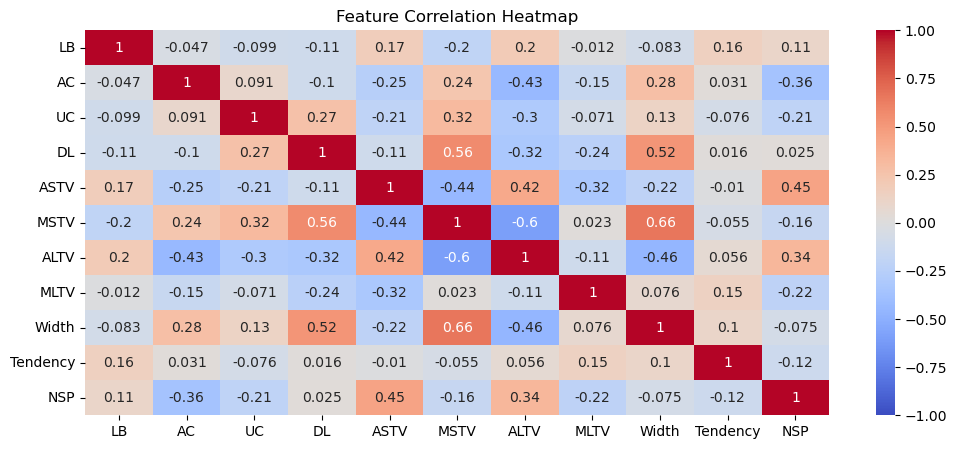

In [83]:
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

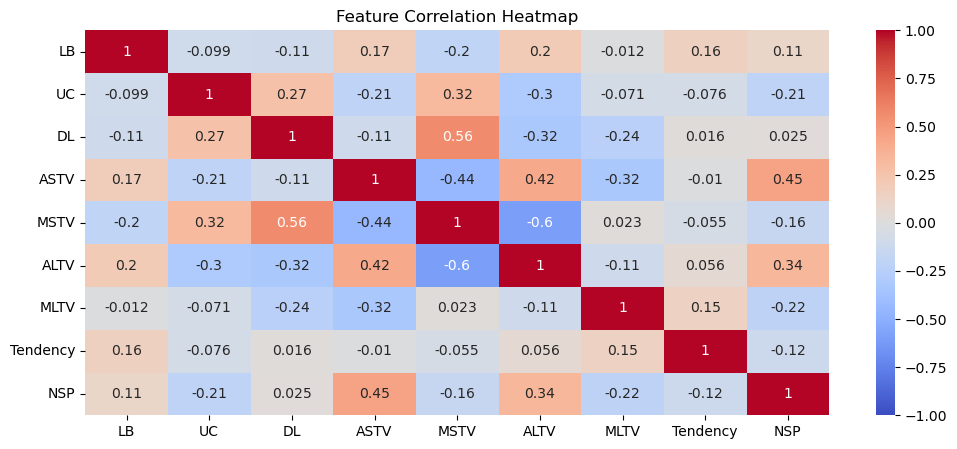

In [84]:
correlation_new = data_test.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_new, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

In [85]:
correlation_new

LB        UC        DL      ASTV      MSTV      ALTV  \
LB        1.000000 -0.098960 -0.108991  0.172091 -0.201907  0.195435   
UC       -0.098960  1.000000  0.269377 -0.205977  0.315054 -0.297398   
DL       -0.108991  0.269377  1.000000 -0.106153  0.564482 -0.321819   
ASTV      0.172091 -0.205977 -0.106153  1.000000 -0.437823  0.415927   
MSTV     -0.201907  0.315054  0.564482 -0.437823  1.000000 -0.595998   
ALTV      0.195435 -0.297398 -0.321819  0.415927 -0.595998  1.000000   
MLTV     -0.011769 -0.071026 -0.241369 -0.321435  0.022932 -0.105051   
Tendency  0.155253 -0.075980  0.016134 -0.010388 -0.055135  0.056351   
NSP       0.106742 -0.207192  0.024879  0.445572 -0.162796  0.337453   

              MLTV  Tendency       NSP  
LB       -0.011769  0.155253  0.106742  
UC       -0.071026 -0.075980 -0.207192  
DL       -0.241369  0.016134  0.024879  
ASTV     -0.321435 -0.010388  0.445572  
MSTV      0.022932 -0.055135 -0.162796  
ALTV     -0.105051  0.056351  0.337453  
MLTV      1.000000  0.147493 -0.217848  
Tendency  0.147493  1.000000 -0.124145  
NSP      -0.217848 -0.124145  1.000000

This is a correlation matrix showing the relationships between different variables. Here’s a summary:

LB: Slight positive correlations with ASTV and ALTV, but generally low correlations with other variables.

UC: Shows moderate positive correlation with DL and MSTV, and negative correlations with ALTV and NSP.

DL: Strong positive correlation with MSTV, but weak correlations with other variables.

ASTV: Strong positive correlation with ALTV, and negative correlations with MSTV and NSP.

MSTV: Strong negative correlation with ALTV and weak correlations with other variables.

ALTV: Strong positive correlation with ASTV, and negative correlations with MSTV and NSP.

MLTV: Slight positive correlation with Tendency and negative correlation with NSP.

Tendency: Slight positive correlation with LB and MLTV, but weak overall.

NSP: Strong positive correlation with ASTV and ALTV, but negative with UC, MSTV, and MLTV.

In [86]:
from scipy.stats import f_oneway
import pandas as pd

def perform_anova(features_df, target_column):
    
    anova_results = {}

    categories = target_column.unique()
    
    for feature_column in features_df.columns:
        feature_groups = [features_df[feature_column][target_column == category] for category in categories]
        
        f_statistic, p_value = f_oneway(*feature_groups)
        
        if p_value < 0.05:
            result_description = "Reject the null hypothesis: significant differences in feature means across categories."
        else:
            result_description = "Fail to reject the null hypothesis: no significant differences in feature means across categories."
        
        anova_results[f"Feature: {feature_column}"] = {
            'F-statistic': f_statistic,
            'P-value': p_value,
            'Result': result_description
        }
    
    return anova_results


In [87]:
perform_anova(X,y)

{'Feature: LB': {'F-statistic': 30.379137766604927,
  'P-value': 3.2040888758863274e-19,
  'Result': 'Reject the null hypothesis: significant differences in feature means across categories.'},
 'Feature: UC': {'F-statistic': 62.53279835521278,
  'P-value': 1.0197869712123709e-38,
  'Result': 'Reject the null hypothesis: significant differences in feature means across categories.'},
 'Feature: DL': {'F-statistic': 36.909430533983794,
  'P-value': 3.067043629665879e-23,
  'Result': 'Reject the null hypothesis: significant differences in feature means across categories.'},
 'Feature: ASTV': {'F-statistic': 195.71560399980385,
  'P-value': 6.989592727766504e-112,
  'Result': 'Reject the null hypothesis: significant differences in feature means across categories.'},
 'Feature: MSTV': {'F-statistic': 112.84241649476137,
  'P-value': 9.903359319653419e-68,
  'Result': 'Reject the null hypothesis: significant differences in feature means across categories.'},
 'Feature: ALTV': {'F-statistic': 

Since all features show significant differences, I can consider each of these features as important in distinguishing between the categories of the target variable. This means that these features provide valuable information for understanding or predicting the target categories.

In [141]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

class SequentialFeatureClustering:
    def __init__(self, num_clusters=4):
        self.num_clusters = num_clusters
        self.models = []
        self.feature_names = None
    
    def fit(self, X, y):
        # Ensure X is a DataFrame if it's not already
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
        
        self.feature_names = X.columns
        self.models = []
        
        clustered_df = X.copy()
        clustered_df['Class'] = y

        for feature in self.feature_names:
            feature_values = clustered_df[[feature]].values
            scaler = StandardScaler()
            scaled_values = scaler.fit_transform(feature_values)
            
            kmeans = KMeans(n_clusters=self.num_clusters, random_state=0)
            clusters = kmeans.fit_predict(scaled_values)
            
            clustered_df['Cluster'] = clusters
            
            for cluster in range(self.num_clusters):
                cluster_data = clustered_df[clustered_df['Cluster'] == cluster]
                cluster_mean = cluster_data[feature].mean()
                cluster_std = cluster_data[feature].std()
                
                # Store the cluster's mean and std deviation
                self.models.append({
                    'feature': feature,
                    'cluster': cluster,
                    'mean': cluster_mean,
                    'std': cluster_std
                })

    def predict(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
        
        results = []
        
        for index, row in X.iterrows():
            for model in self.models:
                feature = model['feature']
                cluster = model['cluster']
                mean = model['mean']
                std = model['std']
                parts = feature.split('_')
                
                if row[feature] < (mean + std) and row[feature] > (mean - std):
                    results.append((parts[1], cluster, mean, std))
                    break
        
        return results

# Example usage:
# Assuming you have data loaded in X_train and y_train
# Convert X_train and X_test to DataFrame if they're not already
feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

clf = SequentialFeatureClustering(num_clusters=4)
clf.fit(X_train_df, y_train)
predictions = clf.predict(X_test_df)
print(predictions)


[('0', 0, 0.4901268408206774, 0.024977199622090225), ('0', 3, 0.4023230314265432, 0.03735168371227662), ('0', 2, 0.5972653877713359, 0.037044538195801), ('0', 1, 0.9808070180379241, 0.05021363567810306), ('2', 2, 0.9658256769125376, 0.04332645942285263), ('1', 3, 0.8409947236667628, 0.06434626493606281), ('1', 2, 0.4961851834705453, 0.04720190690939961), ('0', 0, 0.4901268408206774, 0.024977199622090225), ('2', 1, 0.38518282154371003, 0.03429183675009359), ('1', 1, 0.3043856174780091, 0.04123127359452863), ('0', 0, 0.4901268408206774, 0.024977199622090225), ('0', 2, 0.5972653877713359, 0.037044538195801), ('0', 0, 0.4901268408206774, 0.024977199622090225), ('0', 3, 0.4023230314265432, 0.03735168371227662), ('0', 3, 0.4023230314265432, 0.03735168371227662), ('0', 3, 0.4023230314265432, 0.03735168371227662), ('0', 2, 0.5972653877713359, 0.037044538195801), ('0', 0, 0.4901268408206774, 0.024977199622090225), ('1', 1, 0.3043856174780091, 0.04123127359452863), ('0', 1, 0.9808070180379241, 0

In [142]:
y_pred = [int(predictions[0]) for predictions in predictions]


In [143]:
y_pred

[0,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 5,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 3,
 2,
 0,
 0,
 2,
 0,
 3,
 1,
 2,
 2,
 1,
 2,
 0,
 4,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 5,
 1,
 0,
 0,
 1,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      1.00      0.01         2
           1       0.72      0.18      0.29       477
           2       0.16      0.11      0.13       103
           3       0.00      0.00      0.00        48
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.16       630
   macro avg       0.13      0.18      0.06       630
weighted avg       0.57      0.16      0.24       630



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("Shape of y_test:", y_test.shape)
# Convert predictions to NumPy array
predictions = np.array(predictions)

# Print the shape
print("Shape of predictions:", predictions_array.shape)


In [120]:
import numpy as np
from sklearn.metrics import classification_report

# Convert predictions to class labels by taking the index of the max value in each row
predicted_labels = np.argmax(predictions, axis=1)

# Print shapes and unique labels
print("Shape of y_test:", y_test.shape)
print("Shape of predicted_labels:", predicted_labels.shape)
print("Unique labels in y_test:", np.unique(y_test))
print("Unique labels in predicted_labels:", np.unique(predicted_labels))

# Generate classification report
print(classification_report(y_test, predicted_labels))


AxisError: axis 1 is out of bounds for array of dimension 1

In [122]:
import numpy as np

# Example predictions (list or numpy array) where each element is a list of probabilities
predictions = np.array([
    [0.1, 0.3, 0.4, 0.2],  # Probabilities for sample 1
    [0.2, 0.4, 0.1, 0.3],  # Probabilities for sample 2
    # Add more samples as needed
])

# Convert predictions to class labels (0, 1, 2, 3) by taking the index of the max value
predicted_labels = np.argmax(predictions, axis=1)

# Print unique labels
print("Unique labels in predicted_labels:", np.unique(predicted_labels))


Unique labels in predicted_labels: [1 2]


1019    1
1092    1
69      1
878     1
661     2
       ..
296     3
1609    1
904     1
2114    1
139     2
Name: NSP, Length: 210, dtype: int64
